In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# تحميل بيانات الزهور
dataset_name = "tf_flowers"
dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

# تقسيم البيانات إلى تدريب واختبار
split_ratio = 0.8
num_train = int(split_ratio * info.splits['train'].num_examples)

train_dataset = dataset['train'].take(num_train)  # 80% تدريب
test_dataset = dataset['train'].skip(num_train)   # 20% اختبار

# تحديد حجم الصور والدفعة
img_height = 224
img_width = 224
batch_size = 32

# تجهيز الصور (تغيير الحجم، التطبيع)
def format_image(image, label):
    image = tf.image.resize(image, (img_height, img_width)) / 255.0  # تصغير الصورة وتطبيع القيم
    return image, label

# تطبيق التجهيز على البيانات
train_dataset = train_dataset.map(format_image).batch(batch_size).shuffle(1000)
test_dataset = test_dataset.map(format_image).batch(batch_size)

# **تحميل نموذج MobileNetV2 المدرب مسبقًا**
base_model = keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # تجميد الطبقات الأساسية

# بناء النموذج المحسّن
model = keras.Sequential([
    base_model,
    
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  # إضافة طبقة جديدة لزيادة التعقيد
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),  # طبقة أخرى لزيادة قوة النموذج
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # منع فرط التكيف
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),  # تقليل الاعتماد على الميزات المحددة
    layers.Dense(5, activation='softmax')  # 5 فئات للزهور
])

# تجميع النموذج
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # تقليل معدل التعلم
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# تدريب النموذج
epochs = 15
history = model.fit(train_dataset, 
                    validation_data=test_dataset, 
                    epochs=epochs)

print("✅ تم تدريب النموذج بنجاح! 🎉📈")

# **حفظ النموذج المدرب**
model.save("flower_classifier_model.h5")
print("✅ تم حفظ النموذج بنجاح!")


Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 86s 838ms/step - accuracy: 0.5074 - loss: 1.5058 - val_accuracy: 0.8188 - val_loss: 0.5013
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 889ms/step - accuracy: 0.8339 - loss: 0.4475 - val_accuracy: 0.8733 - val_loss: 0.3690
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 868ms/step - accuracy: 0.9210 - loss: 0.2374 - val_accuracy: 0.8706 - val_loss: 0.3194
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 904ms/step - accuracy: 0.9611 - loss: 0.1245 - val_accuracy: 0.8869 - val_loss: 0.3216
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 886ms/step - accuracy: 0.9821 - loss: 0.0670 - val_accuracy: 0.8910 - val_loss: 0.3405
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 872ms/step - accuracy: 0.9871 - loss: 0.0433 - val_accuracy: 0.8856 - val_loss: 0.3563
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 879ms/step - accuracy: 0.9934 - loss: 0.0258 - val_accuracy: 0.8924 - val_loss: 0.3949
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 871ms/step - accuracy: 0.9958 - loss: 0.0179 - val_accu

✅ تم تدريب النموذج بنجاح! 🎉📈
✅ تم حفظ النموذج بنجاح!


In [2]:
model.save("flower_classifier_model.keras")

In [3]:
import keras

# تحميل النموذج بدون المُحسّن لحل المشكلة
loaded_model = keras.saving.load_model("flower_classifier_model.keras", compile=False)

# إعادة تجميع النموذج بمُحسّن جديد
loaded_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# عرض ملخص النموذج
loaded_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 7, 7, 256)           │       2,949,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,785,861 (25.89 MB)

 Trainable params: 4,526,341 (17.27 MB)

 Non-trainable params: 2,259,520 (8.62 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
الفئة المتوقعة: 2


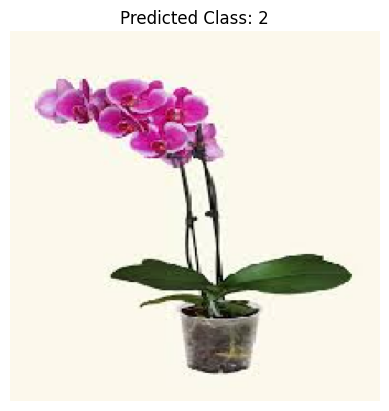

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# تحميل النموذج
model = tf.keras.models.load_model("flower_classifier_model.keras")

# تحميل الصورة الجديدة
img_path = "test_images/orchid.jpg"  # استبدل هذا بالمسار الفعلي للصورة
img = image.load_img(img_path, target_size=(224, 224))  # تغيير الحجم ليتناسب مع النموذج
img_array = image.img_to_array(img) / 255.0  # تحويل الصورة إلى مصفوفة وتطبيعها
img_array = np.expand_dims(img_array, axis=0)  # إضافة بعد لتتناسب مع مدخلات النموذج

# تنفيذ التنبؤ
predictions = model.predict(img_array)

# الحصول على الفئة المتوقعة
predicted_class = np.argmax(predictions)  # إرجاع الفئة ذات الاحتمالية الأعلى

# طباعة النتيجة
print(f"الفئة المتوقعة: {predicted_class}")

# عرض الصورة مع التنبؤ
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis("off")
plt.show()
